<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/Doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# để chọn ngẫu nhiên các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import cifar10
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
import tensorflow as tf
from keras.layers.core import Dense,Activation
from tensorflow.keras import datasets, layers, models

In [79]:
#Tải tập dữ liệu
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [80]:
def load_image(filename):
  # load tấm ảnh lên
  img = load_img(filename, grayscale=True, target_size=(32, 32))
  # chuyển về dạng vector
  img=img_to_array(img)
	# reshape into a single sample with 1 channel
  img=img.reshape(3,1024)
  img=img.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

In [81]:
#có 50000 hình ảnh đào tạo và 10000 hình ảnh thử nghiệm
X_train.shape

(50000, 32, 32, 3)

In [82]:
X_test.shape

(10000, 32, 32, 3)

In [83]:
y_train.shape
#Có 50000 giá trị tương ứng với 50000 tấm ảnh train

(50000, 1)

In [84]:
#y_train là một mảng 2D ,vì việc phân loại mảng 1D đủ tốt nên chúng ta chuyển đổi về mảng 1D
y_train = y_train.reshape(-1)

In [85]:
#y_test cũng tương tự
y_test = y_test.reshape(-1)

In [86]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [87]:
#vẽ một số hình ảnh để xem chúng là gì
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

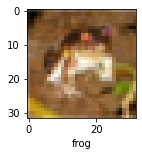

In [88]:
plot_sample(X_train, y_train, 0)

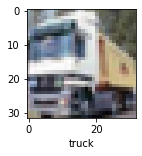

In [89]:
plot_sample(X_train, y_train, 1)

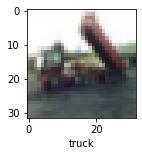

In [70]:
plot_sample(X_train, y_train, 2)

In [90]:
#Chuẩn hóa hình ảnh thành một số từ 0 đến 1. Hình ảnh có 3 kênh (R, G, B) và mỗi giá trị trong kênh có thể nằm trong khoảng từ 0 đến 255.
#Do đó để chuẩn hóa trong phạm vi 0 -> 1, chúng ta cần chia nó bằng 255
#Chuẩn hóa dữ liệu đào tạo
X_train= X_train.astype('float32')
X_train = X_train / 255.0
#print(X_train)
X_test= X_test.astype('float32')
X_test = X_test / 255.0
#print(X_test)

In [91]:
#Xây dựng một mạng nơ-ron phức hợp để đào tạo hình ảnh
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [92]:
#Huấn luyện mô hình cnn (mạng nơ-ron)
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 106s 67ms/step - loss: 1.5016 - accuracy: 0.4537 - val_loss: 1.2527 - val_accuracy: 0.5470
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.0983 - accuracy: 0.6157 - val_loss: 1.0597 - val_accuracy: 0.6346
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.9263 - accuracy: 0.6789 - val_loss: 1.0022 - val_accuracy: 0.6549
Epoch 4/10
1563/1563 [==============================] - 115s 73ms/step - loss: 0.8156 - accuracy: 0.7178 - val_loss: 0.9518 - val_accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7312 - accuracy: 0.7474 - val_loss: 0.8642 - val_accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.6562 - accuracy: 0.7721 - val_loss: 0.8644 - val_accuracy: 0.7094
Epoch 7/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.5953 - accuracy: 0.7929 - val_loss: 0.8692 - val

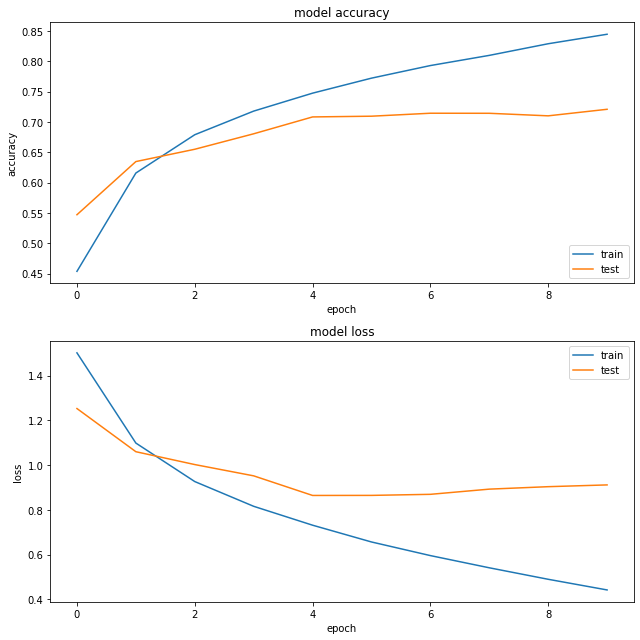

In [93]:
# Đánh giá mô hình cnn (mạng nơ-ron)
history = cnn.fit(X_train,y_train, epochs=10,
                    validation_data=(X_test, y_test))
fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')

plt.subplot (2,1,2)
plt.plot(history.history ['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()

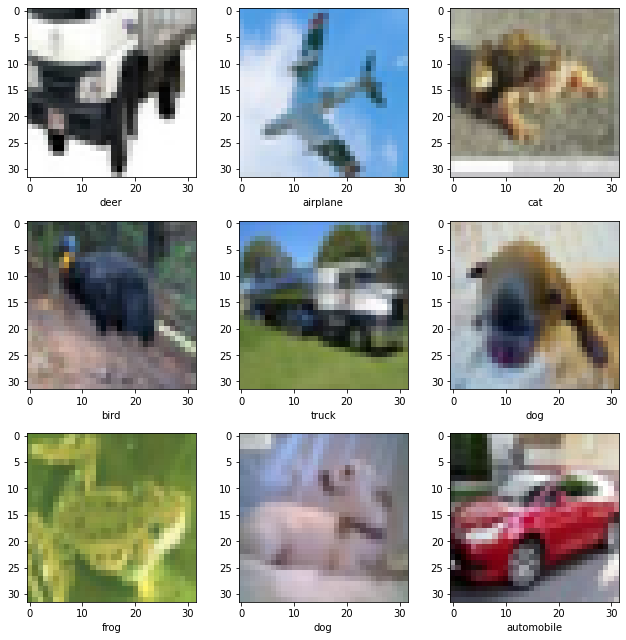

In [95]:
# Hiển thị ngẫu nhiên 9 tấm hình trong tập test và dự đoán
#Hàm này để chọn ngẫu nhiên các tấm ảnh trong tập dữ liệu 
import random
import os
predicted_classes=cnn.predict(X_test)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(X_test))
  plt.imshow(X_test[num])
  y_classes = [np.argmax(element) for element in predicted_classes]
  plt.xlabel(classes[y_classes[num]])
plt.tight_layout()


In [112]:
def load_image(filename):
  import numpy as np
  from PIL import Image
  # load tấm ảnh lên
  global label_packed
  image = Image.open(filename)
  #định hình lại thành một mẫu duy nhất với 3 màu RGB(Red,Green,Blue)
  image = image.resize((32,32))
  image = np.expand_dims(image, axis = 0)
  #Chuyển đổi sang mảng
  image = np.array(image)
  # chuẩn bị dữ liệu pixel
  img=image.astype('float32')
  img=img/255.0
  return img
img_predicted = load_image("horse.jpg")
result = cnn.predict(img_predicted)
print('Dự đoán đây là: ',classes[np.argmax(result)])

Dự đoán đây là:  horse
